In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

In [3]:
#READ IN PLAY BY PLAY
YEAR = 2021
YEAR2 = 2020
YEAR3 = 2019
YEAR4 = 2018
YEAR5 = 2017
YEAR6 = 2016
YEAR7 = 2015

In [4]:
#This year's continuously updating data
data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False)

In [5]:
data = data[data['season_type'] == 'REG']

In [5]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#125740','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

#mapping the color number to a NEW column called color, depending upon the posteam
data['color'] = data['posteam'].map(COLORS)

In [6]:
#Being able to see all the columns is important

pd.set_option('display.max_columns', 400)

In [13]:
#Jets long passes
jetData= data[data["posteam"] == 'NYJ']

jetPass = jetData[jetData['air_yards'] >= 40]
jetPass[['air_yards', 'game_id', 'receiver', 'passer']]

,air_yards,game_id,receiver,passer
2010,46.0,2021_01_NYJ_CAR,C.Davis,Z.Wilson
2025,54.0,2021_01_NYJ_CAR,E.Moore,Z.Wilson
2149,41.0,2021_01_NYJ_CAR,E.Moore,Z.Wilson
11178,48.0,2021_04_TEN_NYJ,K.Cole,Z.Wilson
11204,51.0,2021_04_TEN_NYJ,C.Davis,Z.Wilson
13764,49.0,2021_05_NYJ_ATL,C.Davis,Z.Wilson
24836,47.0,2021_10_BUF_NYJ,E.Moore,M.White


### Between the 4 Jets QBs (Wilson, Flacco, White, and Johnson), only Zach slings the ball.

In [20]:
#QB AirYards when Wilson was playing
dataWeeks1to5 = data[data['week'] <= 4]
passer = (
    dataWeeks1to5.groupby(['passer','posteam'])[['air_yards']]
    .sum()
    .reset_index()
    .sort_values(by=['air_yards'],ascending=False)
    .reset_index(drop=True)
    )

QB = passer.iloc[:37]
QB1 = QB.replace(['B.Roethlisberger', 'J.Garoppolo', 'T.Bridgewater','T.Tagovailoa'],['BigBen', 'Jimmy.G', 'Teddy.B', 'Tua'])

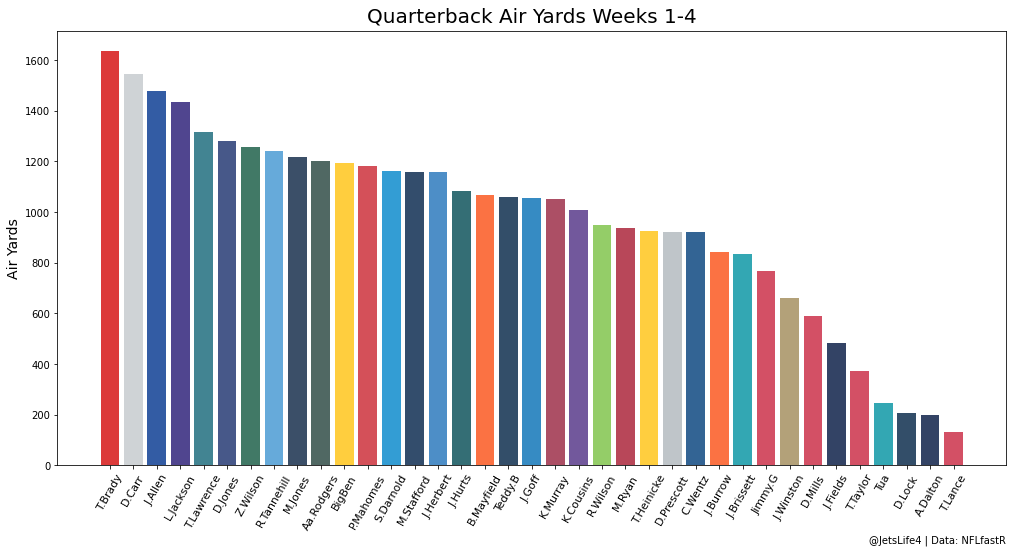

In [22]:
#New column color, containing colors based on the posteam
QB1['color'] = QB1['posteam'].map(COLORS)

plt.figure(figsize= (17,8))
plt.bar(QB1.passer, QB1.air_yards, color = QB1.color, alpha = 0.8)
plt.xticks(rotation=60, fontsize=10.85)
plt.title("Quarterback Air Yards Weeks 1-4", fontsize = 20, pad=9)
plt.ylabel('Air Yards', fontsize=14)
plt.xlabel('@JetsLife4 | Data: NFLfastR', loc='right')
plt.show()

Bad Jets offense but Zach pushes the ball!

In [23]:
dataWeek8 = data[data['week'] == 8]

yardage = (
    dataWeek8.groupby(['passer','posteam', 'week'])[['yards_after_catch', 'air_yards']]
    .sum()
    .reset_index()
    .sort_values(by=['yards_after_catch'],ascending=False)
    .reset_index(drop=True)
    )
yardage[yardage['posteam'] == 'NYJ']
yardage.head(3)

#277 damn YAC

,passer,posteam,week,yards_after_catch,air_yards
0,M.White,NYJ,8,277.0,165.0
1,P.Mahomes,KC,8,213.0,332.0
2,T.Brady,TB,8,205.0,340.0


## Mike White with 277 YAC damn son

In [37]:
#Win Probability for Mike Effing White Bengals game
JETSvsCIN = data[data['game_id'] == '2021_08_CIN_NYJ']

JETSvsCIN.shape

(189, 373)

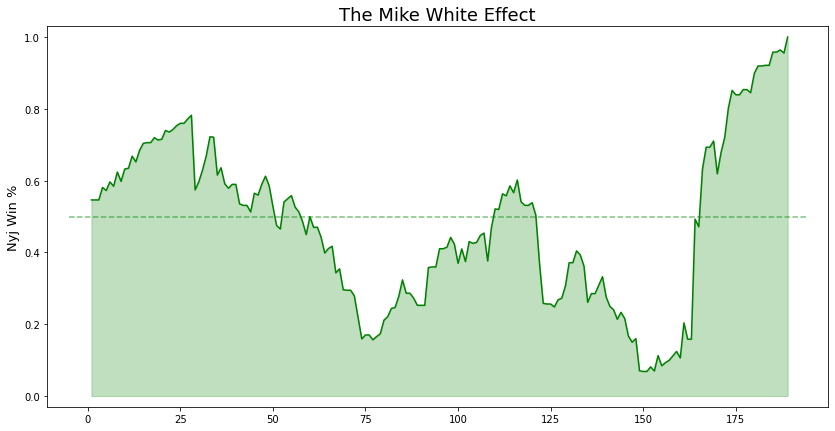

In [93]:
x = [0, 2, 5]
y1 = [1, 2.5, 3]
y2 = [2, 3, 4.5]

i = 1
time =[]
zero = []
#189 rows from .shape ^
while i <= 189: 
    time.append(i)
    i+=1
    zero.append(0)
plt.figure(figsize=(14,7))
plt.plot(time, JETSvsCIN.home_wp, color='green')
plt.title('The Mike White Effect', fontsize =18)
plt.ylabel('Nyj Win %', fontsize =13)
plt.fill_between(time, zero, JETSvsCIN.home_wp, color = 'green', alpha=.25)
plt.plot([-5, 194], [.5, .5], color='green', alpha=.5, linestyle ='--')
plt.margins(.03)
plt.show()

In [27]:
#First Down Success Rate for Offenses and Defenses

#Offense Count of success on 1st
first = data[(data["yards_gained"] >= 4) & (data["down"] == 1)]
firstOff = (
    first.groupby(['posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['posteam'],ascending=True)
    .reset_index(drop=True)
    )

#defense first down stops count
defense = data[(data["yards_gained"] < 4) & (data["down"] == 1)]
firstDef = (
    first.groupby(['defteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['defteam'],ascending=True)
    .reset_index(drop=True)
    )

#Total Offense 1st down snaps
total = data[data['down'] == 1]
totalOff = (
    total.groupby(['posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['posteam'],ascending=True)
    .reset_index(drop=True)
    )

#Total Defense 1st down snaps
totalDef = (
    total.groupby(['defteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['defteam'],ascending=True)
    .reset_index(drop=True)
    )

#Amount of successful first downs divided by total.. success per play
successOff = firstOff.play_id / totalOff.play_id
successDef = firstDef.play_id / totalDef.play_id

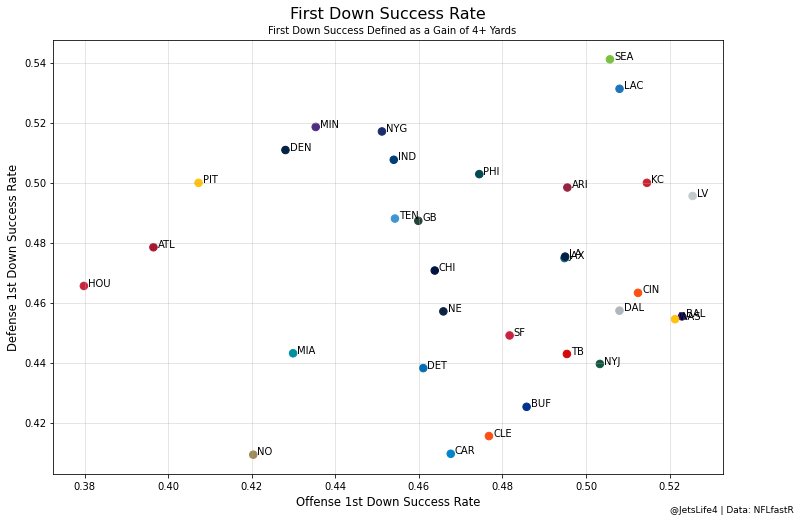

In [36]:
#mapping the color number to a NEW column, depending upon the posteam
totalDef['color'] = totalOff['posteam'].map(COLORS)

plt.figure(figsize= (12,8))
plt.scatter(successOff, successDef, c=totalDef.color, s=56.5)
for i, label in enumerate(totalDef.defteam):
    plt.annotate(label, (successOff[i] + .00099, successDef[i]))
plt.xlabel("Offense 1st Down Success Rate", fontsize=11.6)
plt.ylabel("Defense 1st Down Success Rate", fontsize=11.6)
plt.grid(alpha=.4)
plt.title("First Down Success Rate", pad=21,fontsize=16)
plt.text(.52,.39,'@JetsLife4 | Data: NFLfastR',fontsize=9)
plt.text(.424, .55, 'First Down Success Defined as a Gain of 4+ Yards')
plt.show()

In [6]:
#LOGOS
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')

#for i in range(0,len(urls)):
#    urllib.request.urlretrieve(urls['url'].iloc[i], os.getcwd() + '/LOGOS/' + urls['team_code'].iloc[i] + '.png')


    
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

#logos = os.listdir(os.getcwd() + '/LOGOS')

logo_paths = ['/Users/maxjanniello/Desktop/Python/LOGOS/ARI.png', '/Users/maxjanniello/Desktop/Python/LOGOS/ATL.png', '/Users/maxjanniello/Desktop/Python/LOGOS/BAL.png', '/Users/maxjanniello/Desktop/Python/LOGOS/BUF.png', '/Users/maxjanniello/Desktop/Python/LOGOS/CAR.png', '/Users/maxjanniello/Desktop/Python/LOGOS/CHI.png', '/Users/maxjanniello/Desktop/Python/LOGOS/CIN.png', '/Users/maxjanniello/Desktop/Python/LOGOS/CLE.png', '/Users/maxjanniello/Desktop/Python/LOGOS/DAL.png', '/Users/maxjanniello/Desktop/Python/LOGOS/DEN.png', '/Users/maxjanniello/Desktop/Python/LOGOS/DET.png','/Users/maxjanniello/Desktop/Python/LOGOS/GB.png', '/Users/maxjanniello/Desktop/Python/LOGOS/HOU.png', '/Users/maxjanniello/Desktop/Python/LOGOS/IND.png', '/Users/maxjanniello/Desktop/Python/LOGOS/JAX.png','/Users/maxjanniello/Desktop/Python/LOGOS/KC.png', '/Users/maxjanniello/Desktop/Python/LOGOS/LA.png','/Users/maxjanniello/Desktop/Python/LOGOS/LAC.png','/Users/maxjanniello/Desktop/Python/LOGOS/LV.png','/Users/maxjanniello/Desktop/Python/LOGOS/MIA.png','/Users/maxjanniello/Desktop/Python/LOGOS/MIN.png','/Users/maxjanniello/Desktop/Python/LOGOS/NE.png','/Users/maxjanniello/Desktop/Python/LOGOS/NO.png','/Users/maxjanniello/Desktop/Python/LOGOS/NYG.png', '/Users/maxjanniello/Desktop/Python/LOGOS/NYJ.png', '/Users/maxjanniello/Desktop/Python/LOGOS/PHI.png', '/Users/maxjanniello/Desktop/Python/LOGOS/PIT.png','/Users/maxjanniello/Desktop/Python/LOGOS/SEA.png', '/Users/maxjanniello/Desktop/Python/LOGOS/SF.png','/Users/maxjanniello/Desktop/Python/LOGOS/TB.png','/Users/maxjanniello/Desktop/Python/LOGOS/TEN.png','/Users/maxjanniello/Desktop/Python/LOGOS/WAS.png']

#for i in logos:
#    logo_paths.append(os.getcwd() + '/LOGOS/' + str(i))

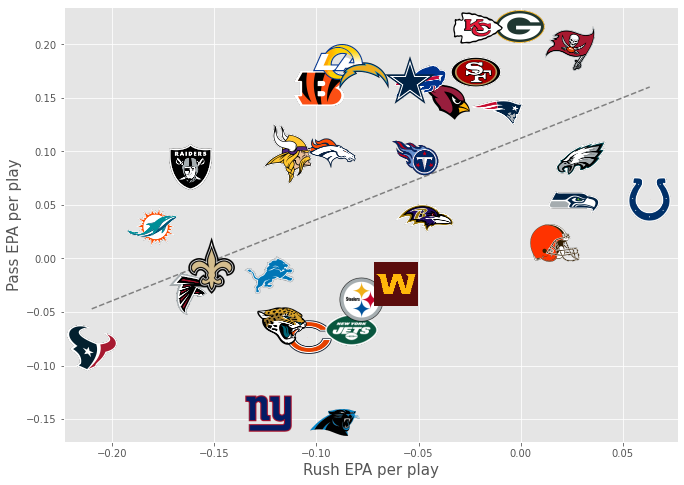

In [10]:
dataPass = data[data['pass'] == 1]
dataRush = data[data['rush'] == 1]

pass_epa = (
    dataPass.groupby(['posteam']).agg({'epa':'mean'})
    .reset_index()
    .sort_values(by=['posteam'],ascending=True)
    .reset_index(drop=True)
    )
rush_epa = (
    dataRush.groupby(['posteam']).agg({'epa':'mean'})
    .reset_index()
    .sort_values(by=['posteam'],ascending=True)
    .reset_index(drop=True)
    )

x = rush_epa.epa
y = pass_epa.epa

#plt.figure(figsize=(10,8))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11,8))
plt.scatter(x, y, s=.001)

for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

#line of best fit    
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
         color='grey', linestyle='--')
plt.xlabel('Rush EPA per play', fontsize=15)
plt.ylabel('Pass EPA per play', fontsize=15)

plt.show()

In [11]:
teams = rush_epa.posteam.values

In [12]:
draft = [1285.4, 2485.2, 2127.1, 1259.4, 1765, 827.2, 1315.1, 2007.8, 1199.6, 2638.9, 4260.2, 1081.2, 3249.8,723.8, 4267.8, 1126, 179.3, 1674, 1386, 1431, 1917.4, 1367.6, 1611.8, 4331.5, 4620, 3647, 1464.1, 903, 622.2, 1093, 829.2, 2046.8]
cap22 = [10960135, -22468285, 22488965, 8615733, 23737707, 41543460, 52852072, 26829148, -15907965, 35031989, 36707187, -42401551, 29946077, 52860094, 40770947, 25876548, 38812255, 62810490, 2463078, 72969180, -11175728, 20443501, -61898841, -241723, 53978154, -4207777, 34932478, 9172385, 41754097, 39023208, 15400103, 59533510]

makeData = pd.DataFrame(columns = ['posteam', 'cap22', 'draft'])
makeData['posteam'] = teams
makeData['cap22'] = cap22
makeData['draft'] = draft
makeData.head(2)

,posteam,cap22,draft
0,ARI,10960135,1285.4
1,ATL,-22468285,2485.2


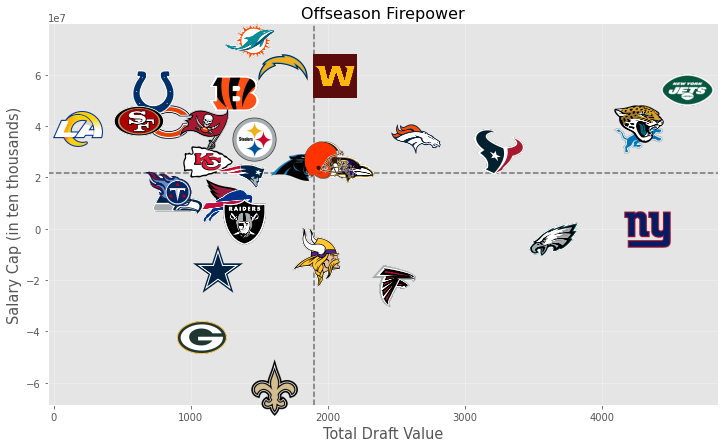

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
plt.scatter(makeData.draft, makeData.cap22, s=.001)

for x0, y0, path in zip(makeData.draft, makeData.cap22, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False, fontsize=4)
    ax.add_artist(ab)

#quadrant average lines
ax.axvline(x=makeData.draft.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=makeData.cap22.mean(), linestyle='--', alpha=.5, color='black')
    
plt.grid(alpha=.35)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Offseason Firepower", fontsize=16)
plt.xlabel('Total Draft Value', fontsize = 14.5)
plt.ylabel('Salary Cap (in ten thousands)', fontsize=14.5)
plt.yticks()
plt.show()

In [51]:
#Mac Jones 1st downs on drives that ended in punts
macPunt = data[(data['down'] == 1) & (data['series_result'] != 'Touchdown') & (data['posteam'] == 'NE') & (data['series_result'] != 'Field goal') & (data['series_result'] != 'First down')]
print(macPunt.shape) #Total plays
macPunt[macPunt['yards_gained'] < 4].shape #Plays that resulted in 3yds or less

(63, 373)


(48, 373)

On every series where the #Patriots have punted, 76% of those first downs resulted in a gain of 3 yards or less.

The #Jets need to be strong defensively on first downs to force Mac Jones to move the ball down the field.

In [52]:
zach20 = data[(data['air_yards'] >= 20) & (data['passer'] == 'Z.Wilson')]
zach20[['cpoe']].mean()

cpoe    14.88539
dtype: float64

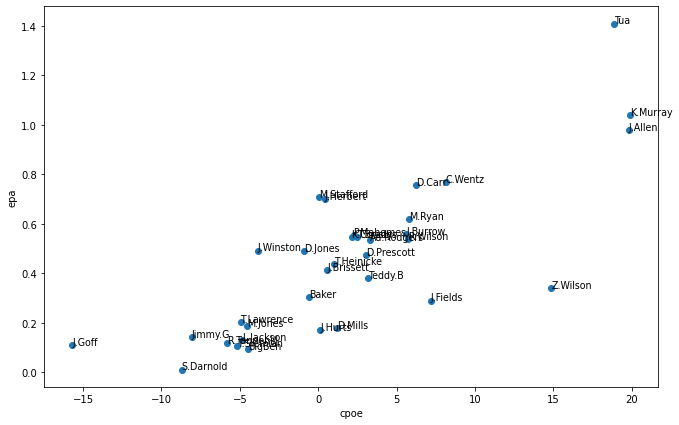

In [56]:
long = data[data['air_yards'] >= 20]
longCPOE = (
    long.groupby(['posteam', 'passer']).agg({'play_id':'count','cpoe':'mean', 'epa':'mean'})
    .reset_index()
    .sort_values(by=['cpoe'],ascending=False)
    .reset_index(drop=True)
    )

longNAME = longCPOE[longCPOE['play_id'] > 12]
completion = longNAME.replace(['B.Mayfield', 'B.Roethlisberger', 'J.Garoppolo', 'T.Bridgewater','T.Tagovailoa'],['Baker', 'BigBen', 'Jimmy.G', 'Teddy.B', 'Tua'])

percentCPOE = completion.cpoe.values
percentEPA = completion.epa.values
plt.figure(figsize= (11,7))
plt.scatter(completion.cpoe, completion.epa)
for i, label in enumerate(completion.passer):
    plt.annotate(label, (percentCPOE[i], percentEPA[i]), fontsize =9.5)
plt.xlabel('cpoe') 
plt.ylabel('epa')
plt.show()

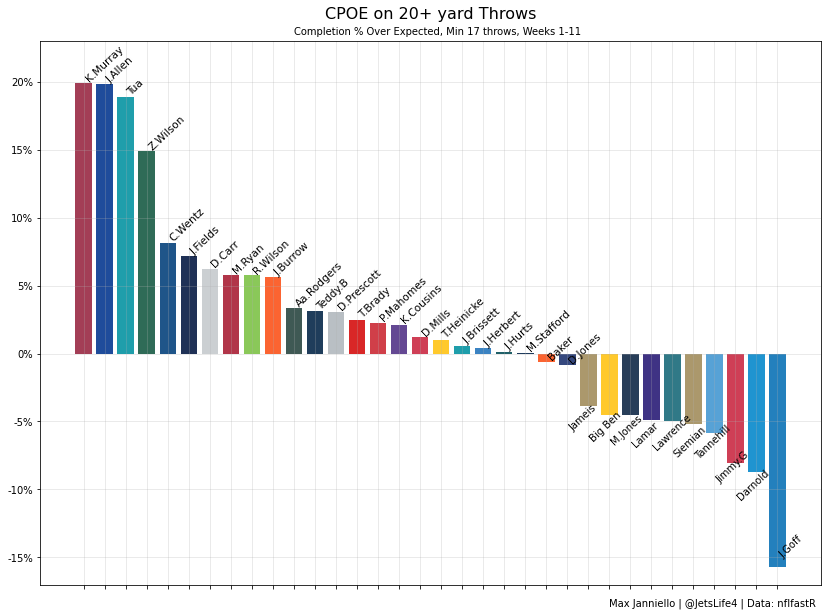

In [64]:


completion['color'] = completion['posteam'].map(COLORS)

name0 = completion.passer.values
name2 = completion.cpoe.values


plt.figure(figsize= (14,10))
plt.bar(completion.passer, completion.cpoe, color = completion.color, alpha=.88)
plt.xticks(rotation=60, fontsize=9)
plt.ylim(-17,23)
plt.grid(alpha=.33)
for i, label in enumerate(completion.passer[:24]):
    plt.annotate(label, (name0[i], name2[i]+.1), fontsize =10.5, rotation =43.5)
    
    
plt.text('D.Jones', -5.7, 'Jameis', rotation = 43.5)
plt.text('J.Winston', -6.5, 'Big Ben', rotation = 43.5)
plt.text('BigBen', -6.7, 'M.Jones', rotation = 43.5)
plt.text('M.Jones', -6.88, 'Lamar', rotation =43.5)
plt.text('L.Jackson', -7.1, 'Lawrence', rotation =43.5)
plt.text('T.Siemian', -7.77, 'Tannehill', rotation =43.5)
plt.text('T.Lawrence', -7.65, 'Siemian', rotation =43.5)
plt.text('R.Tannehill', -9.5, 'Jimmy.G', rotation =43.5)
plt.text('Jimmy.G', -10.76, 'Darnold', rotation =43.5)
plt.text('J.Goff', -15, 'J.Goff', rotation =43.5)


plt.title('CPOE on 20+ yard Throws', fontsize =16, pad =22)
plt.text('Aa.Rodgers', 23.42, 'Completion % Over Expected, Min 17 throws, Weeks 1-11')
plt.xticks(visible=False)
plt.text('BigBen', -18.6, 'Max Janniello | @JetsLife4 | Data: nflfastR')
plt.yticks([-15,-10,-5,0,5,10,15,20], ['-15%', '-10%', '-5%', '0%', '5%', '10%', '15%', '20%'])
plt.show()

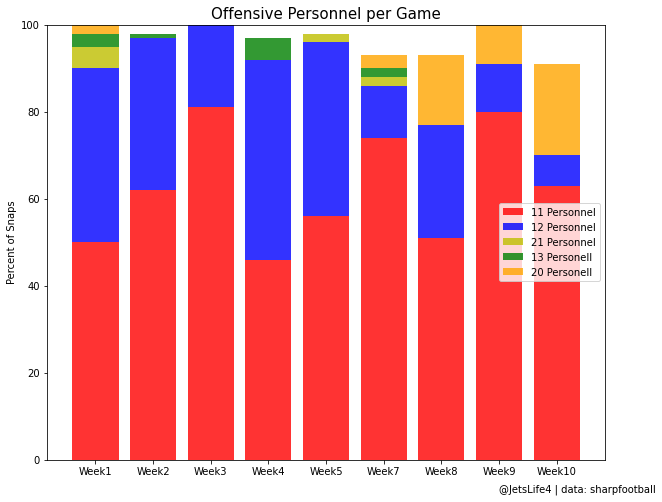

In [65]:
x = ['Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week7', 'Week8', 'Week9', 'Week10']

#11personnel
y1 = np.array([50,62,81,46,56,74,51,80,63])

#12personnel
y2 = np.array([40,35,19,46,40,12,26,11,7])

#21
y3 = np.array([5,0,0,0,2,2,0,0,0])

#13
y4 = np.array([3,1,0,5,0,2,0,0,0])

#20
y5 = np.array([2,0,0,0,0,3,16,9,21])


plt.figure(figsize=(10,8))

# plot bars in stack manner
plt.bar(x, y1, color='r', alpha=.8)
plt.bar(x, y2, bottom=y1, color='b', alpha=.8)
plt.bar(x, y3, bottom=y1+y2, color='y', alpha=.8)
plt.bar(x, y4, bottom=y1+y2+y3, color='g',alpha=.8)
plt.bar(x, y5, bottom =y1+y2+y3+y4, color='orange',alpha=.8)
plt.ylabel("Percent of Snaps")
plt.legend(["11 Personnel", "12 Personnel", "21 Personnel", "13 Personell", '20 Personell'], loc='right')
plt.title("Offensive Personnel per Game", fontsize = 15)
plt.text('Week9', -7.5, '@JetsLife4 | data: sharpfootball')
plt.show()